In [267]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

# Load Model    

In [268]:
# Load the model
model = keras.models.load_model('../fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [269]:
# multiplying data with constant
# read text file of constants
with open('../constants.txt', 'r') as f:
    constants = f.readlines()

# seperate constants from ',' delimiter and turn them into floats   
constants = [x.split(',') for x in constants]

for i in range(len(constants)):
    for j in range(len(constants[i])):
        constants[i][j] = float(constants[i][j])

constants[0]

[-3.4514602950238413,
 1.5113482974975188,
 0.04506911694138332,
 0.08481774081897564,
 -0.09929570045713661,
 -0.1052114951314593,
 -0.06962702815752816,
 0.9220802908586258,
 6.064459319103737,
 0.0008315096586496537,
 0.0004046852066223911,
 0.0021323793348923844]

# Loading The Data

In [270]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [271]:
# Load Android Data
data_source = 'android_data'
data_type = 'wlk'
data_num = '1'
data_url = '../data/' + data_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

df = pd.read_csv(data_url, sep=';')
df = df.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df.columns else df
df = df.drop(['id'], axis=1) if 'id' in df.columns else df
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
0,1.564928,0.672762,0.475846,4.509206,-8.676033,0.750932,0.003670,-0.002243,0.004159,0.012534,0.171424,0.048959
1,1.564928,0.672762,0.475846,4.509206,-8.676033,0.750932,0.003670,-0.002243,0.004159,0.012534,0.171424,0.048959
2,1.564928,0.672762,0.475846,4.502633,-8.676928,0.779499,-0.003554,0.000917,0.001856,0.004542,0.148954,0.046427
3,1.564928,0.672762,0.475846,4.502633,-8.676928,0.779499,-0.003554,0.000917,0.001856,0.004542,0.148954,0.046427
4,1.564928,0.672762,0.475846,4.502633,-8.676928,0.779499,-0.003554,0.000917,0.001856,0.004542,0.148954,0.046427
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,0.983099,0.545619,0.246877,2.912504,-9.302707,1.071158,0.002811,-0.001226,0.001660,-0.006235,-0.014608,0.036818
1374,0.983099,0.545619,0.246877,2.915462,-9.300843,1.079250,0.002220,-0.000834,0.001335,-0.012767,-0.015736,0.042377
1375,0.983099,0.545619,0.246877,2.915462,-9.300843,1.079250,0.002220,-0.000834,0.001335,-0.012767,-0.015736,0.042377
1376,0.983099,0.545619,0.246877,2.915462,-9.300843,1.079250,0.002220,-0.000834,0.001335,-0.012767,-0.015736,0.042377


In [272]:
# Load Orignal Data (for comparison)
data_source_o = 'dataset'
data_type_o = 'wlk_15'
data_num_o = '4'
data_url_o = '../data/' + data_source_o + '/' + data_type_o + '/' + 'sub_' + data_num_o + '.csv'

df_o = pd.read_csv(data_url_o)
df_o = df_o.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df_o.columns else df_o
df_o

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-0.736002,-0.896397,-1.917891,-0.419196,0.781082,-0.462798,-0.423215,-1.520627,-0.004786,0.279120,-0.702240,0.226454
1,-0.783130,-0.906767,-1.940364,-0.434795,0.787516,-0.436771,-1.028157,-1.508040,-0.230150,0.383372,-0.526499,-0.184368
2,-0.835255,-0.921664,-1.971187,-0.448212,0.796609,-0.405608,-1.303925,-1.317619,0.074260,0.094070,1.044807,-1.229875
3,-0.860242,-0.937620,-1.974393,-0.448513,0.806152,-0.385942,0.073591,-1.166072,0.674414,-0.784305,1.503876,-1.132933
4,-0.867391,-0.942021,-1.947695,-0.448550,0.808749,-0.380427,0.456998,-1.516965,0.712793,0.213016,-0.307986,-0.415471
...,...,...,...,...,...,...,...,...,...,...,...,...
3763,-1.582665,-1.050839,2.431138,-0.496780,0.867841,0.005896,-1.005924,0.456647,-0.846780,-0.013093,-0.056378,0.304666
3764,-1.616839,-1.031045,2.399754,-0.513350,0.857837,0.023653,-0.698693,-0.894561,-1.003136,-0.033601,0.157605,-0.046923
3765,-1.676392,-1.012020,2.376141,-0.527168,0.847905,0.055874,-0.757924,-2.740123,-0.825997,0.127281,0.126842,-0.309155
3766,-1.743218,-0.998010,2.364339,-0.533912,0.840394,0.092981,0.147436,-1.841062,-0.537746,0.248527,0.199065,-0.523081


In [273]:
# Multiply data with constants
df = df * constants[0]

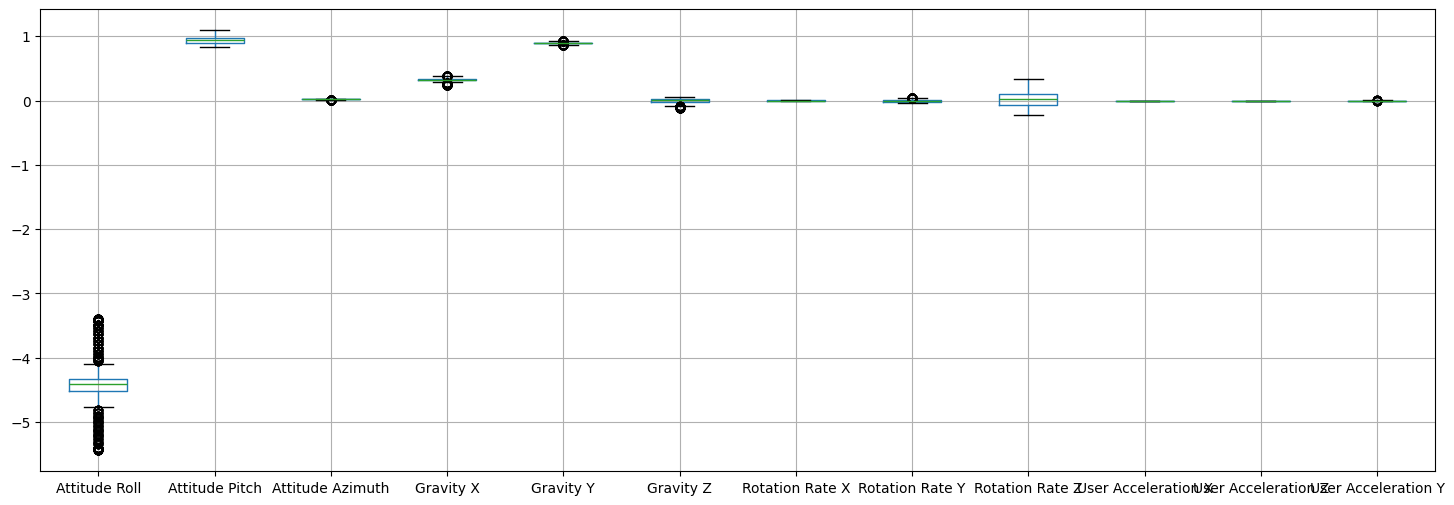

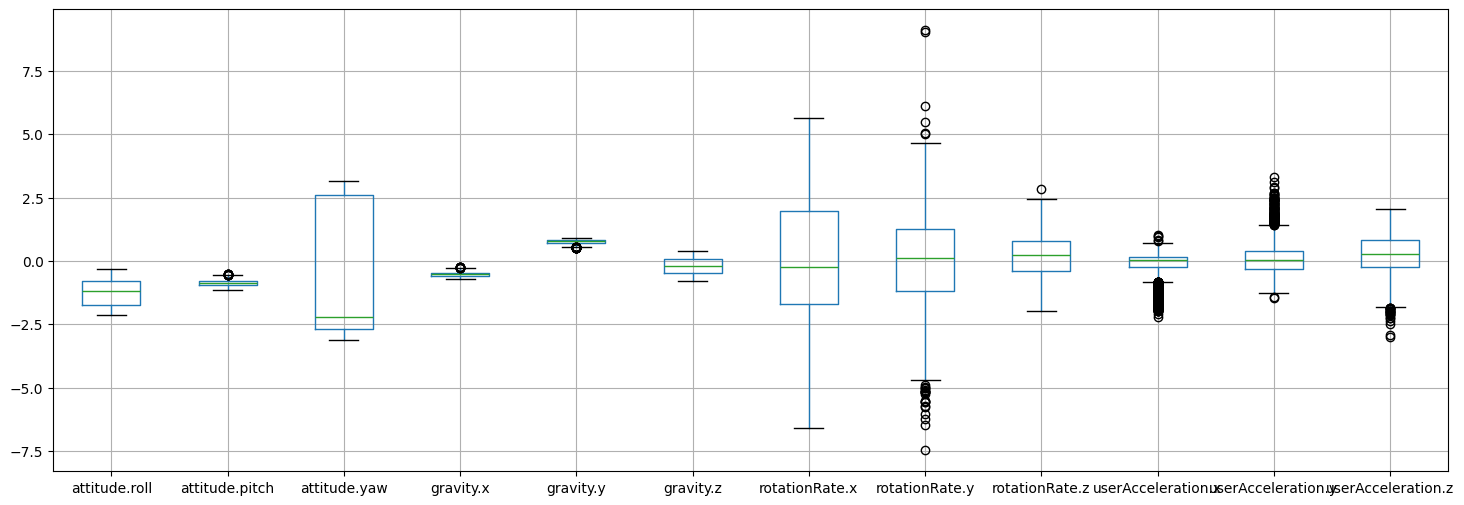

In [274]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [275]:
df.head(    )

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
0,-5.401288,1.016777,0.021446,0.382461,0.861493,-0.079007,-0.000256,-0.002068,0.025225,0.000010,0.000069,0.000104
1,-5.401288,1.016777,0.021446,0.382461,0.861493,-0.079007,-0.000256,-0.002068,0.025225,0.000010,0.000069,0.000104
2,-5.401288,1.016777,0.021446,0.381903,0.861582,-0.082012,0.000247,0.000845,0.011253,0.000004,0.000060,0.000099
3,-5.401288,1.016777,0.021446,0.381903,0.861582,-0.082012,0.000247,0.000845,0.011253,0.000004,0.000060,0.000099
4,-5.401288,1.016777,0.021446,0.381903,0.861582,-0.082012,0.000247,0.000845,0.011253,0.000004,0.000060,0.000099


In [276]:
df_o.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-0.736002,-0.896397,-1.917891,-0.419196,0.781082,-0.462798,-0.423215,-1.520627,-0.004786,0.279120,-0.702240,0.226454
1,-0.783130,-0.906767,-1.940364,-0.434795,0.787516,-0.436771,-1.028157,-1.508040,-0.230150,0.383372,-0.526499,-0.184368
2,-0.835255,-0.921664,-1.971187,-0.448212,0.796609,-0.405608,-1.303925,-1.317619,0.074260,0.094070,1.044807,-1.229875
3,-0.860242,-0.937620,-1.974393,-0.448513,0.806152,-0.385942,0.073591,-1.166072,0.674414,-0.784305,1.503876,-1.132933
4,-0.867391,-0.942021,-1.947695,-0.448550,0.808749,-0.380427,0.456998,-1.516965,0.712793,0.213016,-0.307986,-0.415471


# Preprocessing Data

In [277]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [278]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

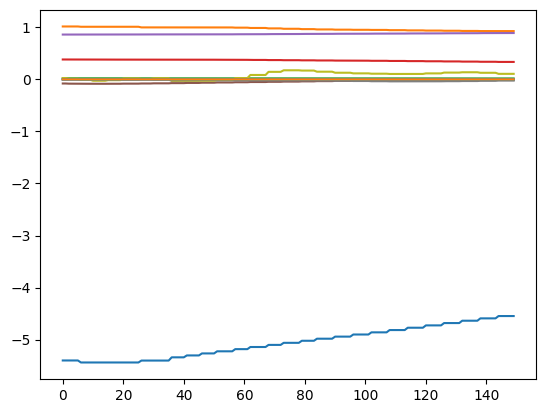

In [279]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

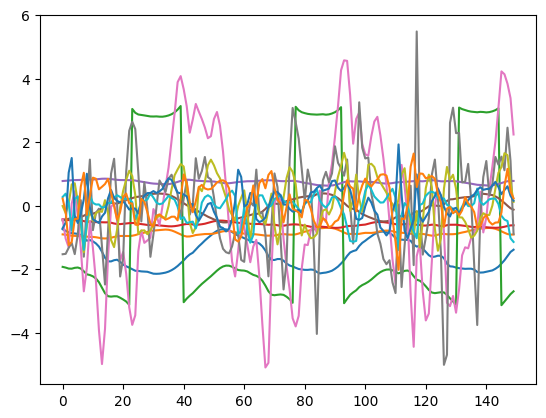

In [280]:
txc = sequence_generator(df_o, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(txc[0])
plt.show()

# Prediction

In [281]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'std'